In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [3]:
images, labels = x_train[0:1000] / 255, y_train[0:1000]

relu = lambda x: (x > 0) * x

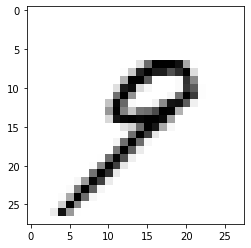

In [4]:
index = 501
plt.imshow(images[index], cmap='Greys')

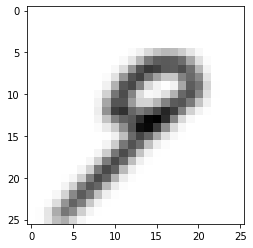

In [18]:
nuclear_rank = 3
sv_weights_1 = np.eye(3)
nuclear = np.array([[0.5, 0.5, 0.5],
                    [0.5, 0.5, 0.5],
                    [0.5, 0.5, 0.5]])
rank = images[1].shape[1] - nuclear_rank
sv_layer_1 = np.zeros((rank + 1, rank + 1))
for y in range(rank + 1):
    for x in range(rank + 1):
        for j in range(nuclear_rank):
            for i in range(nuclear_rank):
                nuclear[i][j] = images[501][x + i][y + j]
        sv_layer_1[x][y] = relu(nuclear.dot(sv_weights_1).sum())
plt.imshow(sv_layer_1, cmap='Greys')

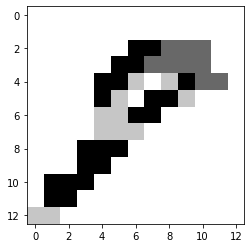

In [6]:
nuclear_rank = 2
nuclear = np.zeros((nuclear_rank, nuclear_rank))
rank = sv_layer_1.shape[1] // 2
sv_layer_2 = np.zeros((rank,  rank))
for y in range(rank):
    for x in range(rank):
        for j in range(nuclear_rank):
            for i in range(nuclear_rank):
                nuclear[i][j] = sv_layer_1[2 * x + i][2 * y + j]
        sv_layer_2[x][y] = nuclear.argmax()
plt.imshow(sv_layer_2, cmap='Greys')

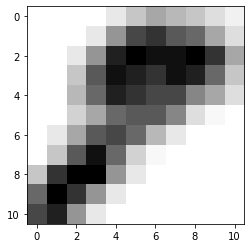

In [7]:
nuclear_rank = 3
sv_weights_1 = np.eye(3)
nuclear = np.zeros((nuclear_rank, nuclear_rank))
rank = sv_layer_2.shape[1] - nuclear_rank
sv_layer_3 = np.zeros((rank + 1, rank + 1))
for y in range(rank + 1):
    for x in range(rank + 1):
        for j in range(nuclear_rank):
            for i in range(nuclear_rank):
                nuclear[i][j] = sv_layer_2[x + i][y + j]
        sv_layer_3[x][y] = relu(nuclear.dot(sv_weights_1).sum())
plt.imshow(sv_layer_3, cmap='Greys')

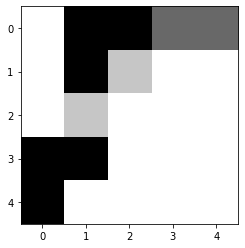

In [8]:
nuclear_rank = 2
nuclear = np.zeros((nuclear_rank, nuclear_rank))
rank = sv_layer_3.shape[1] // 2
sv_layer_4 = np.zeros((rank,  rank))
for y in range(rank):
    for x in range(rank):
        for j in range(nuclear_rank):
            for i in range(nuclear_rank):
                nuclear[i][j] = sv_layer_3[2 * x + i][2 * y + j]
        sv_layer_4[x][y] = nuclear.argmax()
plt.imshow(sv_layer_4, cmap='Greys')

In [9]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
sv_layer_2.shape[1]

13